## Claificación Binaria utilizando K Nearest Neighbors

In [44]:
#Cargar bibliotecas

import pandas as pd
import numpy as np 


In [45]:

datos = pd.read_csv('https://raw.githubusercontent.com/ilich917/Semana-2/main/Dia%202/data.csv')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
datos.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [47]:
datos.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1)

In [48]:
datos.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [49]:
# Columna diagnostico --> en 'target'


datos = datos.rename(columns={'diagnosis':'target'})


In [50]:
# de M = 1 y B = 0

datos['target'] = [1 if i.strip() == 'M' else 0 for i in datos.target]
datos.head(2)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [51]:
datos.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [52]:
# Preparación de los datos

# separar la columna target
Y = datos.target
X = datos.drop(['target'], axis = 1)

In [53]:
from sklearn.model_selection import train_test_split

test_size = .3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =test_size, random_state = 42)

In [54]:
print('X_train : ' , len(X_train))
print('X_test : ' , len(X_test))
print('Y_train : ' , len(Y_train))
print('Y_test : ' , len(Y_test))

X_train :  398
X_test :  171
Y_train :  398
Y_test :  171


## Estandarización 

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

#scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
columns = X.columns.tolist()

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.652819e-16,-5.810539e-16,-6.058805e-16,2.041918e-16,-2.120024e-17,-1.355699e-16,-1.827126e-16,-1.330594e-16,7.445189e-16,2.496607e-16,...,6.047647e-16,-1.980549e-16,-3.057298e-16,-1.991707e-16,9.007312e-16,-1.617913e-16,1.202277e-16,9.093787e-17,-2.785321e-16,1.461701e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.836464e+00,-2.245111e+00,-1.810311e+00,-1.365377e+00,-2.433051e+00,-1.640911e+00,-1.132915e+00,-1.286097e+00,-2.370161e+00,-1.754890e+00,...,-1.587373e+00,-2.243853e+00,-1.600220e+00,-1.154748e+00,-2.197162e+00,-1.446868e+00,-1.370635e+00,-1.784161e+00,-2.117613e+00,-1.628809e+00
25%,-6.863161e-01,-7.102232e-01,-6.781539e-01,-6.517481e-01,-7.572809e-01,-7.800619e-01,-7.523426e-01,-7.367012e-01,-6.980367e-01,-6.905392e-01,...,-6.701191e-01,-7.380288e-01,-6.906849e-01,-6.320618e-01,-7.587574e-01,-6.855591e-01,-7.760495e-01,-7.829110e-01,-6.511070e-01,-7.077340e-01
50%,-2.551700e-01,-1.090984e-01,-2.587218e-01,-3.167308e-01,-9.722838e-02,-2.350839e-01,-3.369099e-01,-3.804602e-01,-5.620170e-02,-1.849553e-01,...,-2.737620e-01,-5.832825e-02,-2.911130e-01,-3.407646e-01,-2.705181e-02,-2.683733e-01,-2.159212e-01,-2.283327e-01,-1.213010e-01,-1.927549e-01
75%,5.419902e-01,5.692460e-01,5.510809e-01,3.839945e-01,6.191923e-01,5.332330e-01,5.017380e-01,6.776427e-01,5.679340e-01,4.618745e-01,...,5.048709e-01,6.496585e-01,5.428353e-01,3.147198e-01,6.187627e-01,6.232624e-01,5.931956e-01,7.297391e-01,4.394337e-01,4.691161e-01
max,3.945850e+00,4.780684e+00,3.967339e+00,5.137153e+00,4.904988e+00,4.068820e+00,4.357306e+00,4.055859e+00,4.608979e+00,4.803888e+00,...,4.120586e+00,3.999076e+00,4.353182e+00,5.915678e+00,3.767380e+00,4.640507e+00,3.241075e+00,2.535233e+00,6.033124e+00,5.113359e+00


## Clasificación con algoritmo de KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier as KNNC

In [58]:
# un vecino 
k = 1

# creamos a knn 
knn = KNNC(n_neighbors= k)

# ajustamos los datos de entrenamiento
knn.fit(X_train, Y_train)

# Predecimos en los datos de prueba
Y_pred = knn.predict(X_test)

## Metrica de Evaluación

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

cf_matrix = confusion_matrix(Y_test, Y_pred)

acc = accuracy_score(Y_test, Y_pred)

# llama accuracy_score desde el algoritmo 
score = knn.score(X_test, Y_test)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

## Visualización de resultados

In [61]:
print('knn accuracy : ', acc)
print('\n')
print('knn accuracy : ', score)

knn accuracy :  0.9532163742690059


knn accuracy :  0.9532163742690059


In [62]:
cf_matrix

array([[105,   3],
       [  5,  58]])

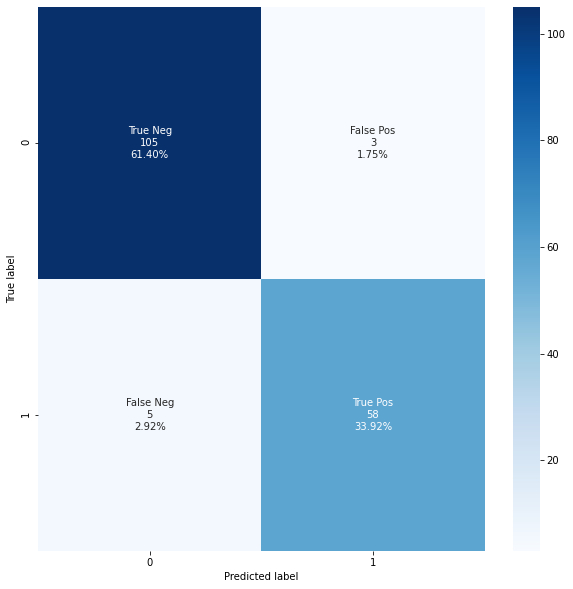

In [63]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [ f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,10))
sns.heatmap(cf_matrix, annot = labels , fmt = '', cmap = 'Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Precisión y Recall 

from sklearn.neighbors import KNeighborsClassifier as KNNC 

k = 1
# aprendisaje y predicción 

knn = KNNC(n_neighbors= k)

knn.fit(X_train, Y_train)  # Ajustamos los datos de entrenamiento con la función .fit()

y_pred = knn.predict(X_test)  # Predecimos en base a los datos de prueba con la funcion 
                              # .predict()
    
    

# Precision - Recall 

cf_matrix  = confusion_matrix(Y_test, y_pred)

TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]

precision = (TP/(TP+ FP))

recall = (TP/(TP + FN))

print( 'Precission :', precision)
print('\n')
print('Recall : ', recall)

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

y_score = knn.score(X_test, Y_test)

average_precision = average_precision_score(Y_test, y_pred)

disp = plot_precision_recall_curve(knn, X_test, Y_test)

disp.ax_.set_title('Precision - Recall curve: ' 'AP = (0:0.2f)'.format(average_precision))

plt.show()

## Comparacion de modelos 


#### <b> Probar con distintos valores de k  </b>

In [64]:
#valores_k = [k  for k in range(1, 392, 10)]
valores_k = [k for k in range(1, 30, 1)]

train_score, test_score = list(), list()

for k in valores_k:
    
    knn2 = KNNC(n_neighbors= k, metric = 'Mahalanobis', metric_params= ('V': np.cov(x,rowvar=False)))
    #knn = KNNC(n_neighbors= k)
    knn.fit(X_train, Y_train)
    Y_pred_train = knn.predict(X_train)
    
    train_acc = accuracy_score(Y_train, Y_pred_train)
    train_score.append(train_acc) 
    
    # Ahora sobre test 
    
    test_yhat = knn.predict(X_test)
    test_acc = accuracy_score(Y_test, test_yhat)
    test_score.append(test_acc)
    
    # Resumir el progreso 
    print('>%d, train : %.3f, test : %.3f' % (k, train_acc, test_acc))
    
 

SyntaxError: invalid syntax (<ipython-input-64-9183f197b54a>, line 8)

In [ ]:
# Graficando 
plt.figure(figsize = (10,10))
plt.plot(valores_k, train_score, '-o', label = 'Train')
plt.plot(valores_k, test_score, '-o', label = 'Test')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()